In [35]:
import requests 
from bs4 import BeautifulSoup as bs 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np 
import string 
import spacy 
from nltk import tokenize
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize, word_tokenize

### 1) Importing Reviews

In [36]:
import requests
from bs4 import BeautifulSoup as bs

iphone13_reviews = []

for i in range(1, 20):
    ip = []
    url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.findAll("span", attrs={"class", "a-size-base review-text review-text-content"})
    for review in reviews:
        ip.append(review.text)
    iphone13_reviews += ip

with open("iphone13.txt", "w", encoding='utf8') as output:
    for review in iphone13_reviews:
        output.write(review + "\n")


In [37]:
df=iphone13_reviews

In [38]:
df

['\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.\n',
 '\n1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as com

### 2) Lets remove trailing and leading characters along with empty strings

In [39]:
df = [y.strip() for y in df]
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 '1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to ot

In [40]:
df = [x for x in df if x] 
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 '1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to ot

### 3) Lets Join the list into one string

In [41]:
df1 = ' '.join(df)
df1

"i was completely satisfied with amazons delivery, it was safe. the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it. 1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premi

In [42]:
df2 = df1.translate(str.maketrans("", "", string.punctuation)) 
df2

'i was completely satisfied with amazons delivery it was safe the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones Camera quality you can’t even think of comparing it with any other phone in the world You definitely don’t need to carry a FSLR or a video cam after you own this piece You can literally make a professional movie from its cameraThe only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the bestMy suggestion is go for it only if you have the capacity to own it 1st thing 1st Look  Very good looking phone and feel premium when you hold itA refresh rate of 120Hz is good to feel on 13 pro max Camera quality is just superb pics from 13 pro max looks more real as compare to other premium segments whic

### 4) Lets Perform Tokenization

In [43]:
df1_tokens = word_tokenize(df2)
df1_tokens

['i',
 'was',
 'completely',
 'satisfied',
 'with',
 'amazons',
 'delivery',
 'it',
 'was',
 'safe',
 'the',
 'phone',
 'is',
 'amazing',
 'I',
 'have',
 'started',
 'using',
 'iPhone',
 'from',
 '5',
 'series',
 'and',
 'since',
 'then',
 'this',
 'is',
 '7th',
 'iPhone',
 'which',
 'I',
 'upgrade',
 'and',
 'I',
 'must',
 'say',
 'till',
 'date',
 'this',
 'has',
 'got',
 'the',
 'best',
 'battery',
 'I',
 'have',
 'observed',
 'in',
 'any',
 'of',
 'my',
 'previous',
 'iPhones',
 'Camera',
 'quality',
 'you',
 'can',
 '’',
 't',
 'even',
 'think',
 'of',
 'comparing',
 'it',
 'with',
 'any',
 'other',
 'phone',
 'in',
 'the',
 'world',
 'You',
 'definitely',
 'don',
 '’',
 't',
 'need',
 'to',
 'carry',
 'a',
 'FSLR',
 'or',
 'a',
 'video',
 'cam',
 'after',
 'you',
 'own',
 'this',
 'piece',
 'You',
 'can',
 'literally',
 'make',
 'a',
 'professional',
 'movie',
 'from',
 'its',
 'cameraThe',
 'only',
 'thing',
 'is',
 'that',
 'you',
 'need',
 'to',
 'shell',
 'out',
 'hell',
 'lo

In [44]:
df1_tokens[0:50]

['i',
 'was',
 'completely',
 'satisfied',
 'with',
 'amazons',
 'delivery',
 'it',
 'was',
 'safe',
 'the',
 'phone',
 'is',
 'amazing',
 'I',
 'have',
 'started',
 'using',
 'iPhone',
 'from',
 '5',
 'series',
 'and',
 'since',
 'then',
 'this',
 'is',
 '7th',
 'iPhone',
 'which',
 'I',
 'upgrade',
 'and',
 'I',
 'must',
 'say',
 'till',
 'date',
 'this',
 'has',
 'got',
 'the',
 'best',
 'battery',
 'I',
 'have',
 'observed',
 'in',
 'any',
 'of']

In [45]:
len(df1_tokens)

3880

In [46]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
no_stop_tokens = [word for word in df1_tokens if not word in stop_words]
print(no_stop_tokens[0:50])

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'I', 'started', 'using', 'iPhone', '5', 'series', 'since', '7th', 'iPhone', 'I', 'upgrade', 'I', 'must', 'say', 'till', 'date', 'got', 'best', 'battery', 'I', 'observed', 'previous', 'iPhones', 'Camera', 'quality', '’', 'even', 'think', 'comparing', 'phone', 'world', 'You', 'definitely', '’', 'need', 'carry', 'FSLR', 'video', 'cam', 'piece', 'You', 'literally', 'make']


### 5) Lets normalize the data

In [48]:
df2= [x.lower() for x in no_stop_tokens]
print(df2[0:50])

['completely', 'satisfied', 'amazons', 'delivery', 'safe', 'phone', 'amazing', 'i', 'started', 'using', 'iphone', '5', 'series', 'since', '7th', 'iphone', 'i', 'upgrade', 'i', 'must', 'say', 'till', 'date', 'got', 'best', 'battery', 'i', 'observed', 'previous', 'iphones', 'camera', 'quality', '’', 'even', 'think', 'comparing', 'phone', 'world', 'you', 'definitely', '’', 'need', 'carry', 'fslr', 'video', 'cam', 'piece', 'you', 'literally', 'make']


### 6) Stemming

In [49]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df2_tokens = [ps.stem(word) for word in df2]
print(df2_tokens[0:50])

['complet', 'satisfi', 'amazon', 'deliveri', 'safe', 'phone', 'amaz', 'i', 'start', 'use', 'iphon', '5', 'seri', 'sinc', '7th', 'iphon', 'i', 'upgrad', 'i', 'must', 'say', 'till', 'date', 'got', 'best', 'batteri', 'i', 'observ', 'previou', 'iphon', 'camera', 'qualiti', '’', 'even', 'think', 'compar', 'phone', 'world', 'you', 'definit', '’', 'need', 'carri', 'fslr', 'video', 'cam', 'piec', 'you', 'liter', 'make']


### 7) Natural Langage Processing

In [50]:
nlp = spacy.load('en_core_web_sm')

In [51]:
df3= nlp(' '.join(no_stop_tokens))
print(df3[0:50])

completely satisfied amazons delivery safe phone amazing I started using iPhone 5 series since 7th iPhone I upgrade I must say till date got best battery I observed previous iPhones Camera quality ’ even think comparing phone world You definitely ’ need carry FSLR video cam piece You literally make


In [52]:
lemmas = [token.lemma_ for token in df3]
print(lemmas[0:25])

['completely', 'satisfied', 'amazon', 'delivery', 'safe', 'phone', 'amazing', 'I', 'start', 'use', 'iPhone', '5', 'series', 'since', '7th', 'iPhone', 'I', 'upgrade', 'I', 'must', 'say', 'till', 'date', 'get', 'good']


### 8) Performing Feature Extraction

In [53]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

In [54]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,completely,satisfied,amazon,delivery,safe,phone,amazing,start,use,iphone,...,beatprosbest,phonesuperior,performancecinematic,modebrighter,displayexcellent,lifeconscould,chargingcinematic,mode,cap,1080p
0,60,195,15,67,193,168,14,215,242,119,...,30,169,166,139,72,126,50,138,43,0


In [55]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
1080p,0
12,1
120hz,2
13,3
14,4
155,5
1st,6
30,7
512,8
6000,9


In [56]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
completely,60
satisfied,195
amazon,15
delivery,67
safe,193
...,...
lifeconscould,126
chargingcinematic,50
mode,138
cap,43


In [57]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(25)

,0
you,260
would,259
world,258
work,257
with,256
wise,255
when,254
whatsapp,253
well,252
week,251


In [58]:
print(vectorizer.vocabulary_)

{'completely': 60, 'satisfied': 195, 'amazon': 15, 'delivery': 67, 'safe': 193, 'phone': 168, 'amazing': 14, 'start': 215, 'use': 242, 'iphone': 119, 'series': 202, 'since': 205, '7th': 10, 'upgrade': 240, 'must': 143, 'say': 196, 'till': 232, 'date': 63, 'get': 96, 'good': 99, 'battery': 27, 'observe': 154, 'previous': 175, 'iphones': 120, 'camera': 41, 'quality': 183, 'even': 79, 'think': 230, 'compare': 58, 'world': 258, 'you': 260, 'definitely': 65, 'need': 144, 'carry': 45, 'fslr': 90, 'video': 247, 'cam': 40, 'piece': 171, 'literally': 129, 'make': 135, 'professional': 180, 'movie': 141, 'camerathe': 42, 'thing': 229, 'shell': 203, 'hell': 109, 'lot': 132, 'money': 140, 'owner': 161, 'beauty': 32, 'end': 78, 'give': 97, 'satisfaction': 194, 'nothing': 151, 'else': 77, 'bestmy': 35, 'suggestion': 221, 'go': 98, 'capacity': 44, '1st': 6, 'look': 131, 'very': 246, 'feel': 86, 'premium': 174, 'hold': 112, 'ita': 122, 'refresh': 191, 'rate': 185, '120hz': 2, '13': 3, 'pro': 177, 'max'

In [59]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
print(x.toarray().shape)

(2275, 261)


In [61]:
print(vectorizer.get_feature_names_out()[50:100])

['chargingcinematic' 'check' 'color' 'combination' 'comment'
 'commentsjust' 'commentsthose' 'comparatively' 'compare' 'compile'
 'completely' 'conspros1' 'could' 'date' 'day' 'definitely' 'deliver'
 'delivery' 'demand' 'different' 'digital' 'display' 'displayexcellent'
 'doubt' 'drain' 'drop' 'due' 'else' 'end' 'even' 'ever' 'excellent'
 'experience' 'face' 'fast' 'feature' 'feel' 'feeling' 'find' 'first'
 'fslr' 'fully' 'gaming' 'gb' 'genuine' 'genuineness' 'get' 'give' 'go'
 'good']


### 9) Lets try and include bi and tri grams

In [62]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features = 100)
df4= vectorizer_ngram_range.fit_transform(df)
df4

<50x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1670 stored elements in Compressed Sparse Row format>

In [63]:
print(vectorizer_ngram_range.get_feature_names_out())

['12' '120hz' '13' '13 pro' '13 pro max' '14' '14 pro' 'about' 'all' 'and'
 'android' 'any' 'apple' 'are' 'as' 'at' 'at the' 'battery' 'battery life'
 'be' 'best' 'but' 'camera' 'camera quality' 'can' 'charging' 'could'
 'days' 'delivery' 'different' 'don' 'don listen to' 'even' 'excellent'
 'experience' 'feel' 'first' 'for' 'from' 'genuine' 'go' 'good' 'got'
 'has' 'have' 'if' 'in' 'iphone' 'iphone 13 pro max' 'iphone 14'
 'iphone 14 pro' 'is' 'is that' 'it' 'it was' 'just' 'life' 'max' 'my'
 'need' 'need to' 'no' 'not' 'notifications' 'of' 'of money' 'of the' 'on'
 'only' 'optimised' 'other' 'own' 'phone' 'pro' 'pro max' 'product' 'pros'
 'quality' 'really' 'refresh' 'smooth' 'so' 'that' 'the' 'the best' 'then'
 'this' 'this is' 'to' 'to the' 'up' 'up to' 'use' 'very' 'video' 'was'
 'with' 'would' 'you' 'you can']


In [64]:
print(df4.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 9 2]
 [0 1 2 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 0]
 [2 0 0 ... 0 0 0]
 [0 1 1 ... 1 0 0]]


#### TFidf vectorizer

In [65]:
vectorizer_n_gram2 = TfidfVectorizer(norm="l1",analyzer='word',ngram_range=(1,4),max_features = 100)
tf_idf_matrix_n_gram= vectorizer_n_gram2.fit_transform(df)

In [66]:
print(vectorizer_n_gram2.get_feature_names_out())

['12' '120hz' '13' '13 pro' '13 pro max' '14' '14 pro' 'about' 'all' 'and'
 'android' 'any' 'apple' 'are' 'as' 'at' 'at the' 'battery' 'battery life'
 'be' 'best' 'but' 'camera' 'camera quality' 'can' 'charging' 'could'
 'days' 'delivery' 'different' 'don' 'don listen to' 'even' 'excellent'
 'experience' 'feel' 'first' 'for' 'from' 'genuine' 'go' 'good' 'got'
 'has' 'have' 'if' 'in' 'iphone' 'iphone 13 pro max' 'iphone 14'
 'iphone 14 pro' 'is' 'is that' 'it' 'it was' 'just' 'life' 'max' 'my'
 'need' 'need to' 'no' 'not' 'notifications' 'of' 'of money' 'of the' 'on'
 'only' 'optimised' 'other' 'own' 'phone' 'pro' 'pro max' 'product' 'pros'
 'quality' 'really' 'refresh' 'smooth' 'so' 'that' 'the' 'the best' 'then'
 'this' 'this is' 'to' 'to the' 'up' 'up to' 'use' 'very' 'video' 'was'
 'with' 'would' 'you' 'you can']


In [67]:
print(tf_idf_matrix_n_gram.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.10935425 0.0285179 ]
 [0.         0.02104778 0.03679405 ... 0.         0.02104778 0.        ]
 ...
 [0.         0.         0.         ... 0.02445144 0.         0.        ]
 [0.11999117 0.         0.         ... 0.         0.         0.        ]
 [0.         0.02625679 0.02295002 ... 0.02625679 0.         0.        ]]


### 10) Preparing Wordcloud

In [68]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    
    plt.imshow(wordcloud)       
    plt.axis("off")      

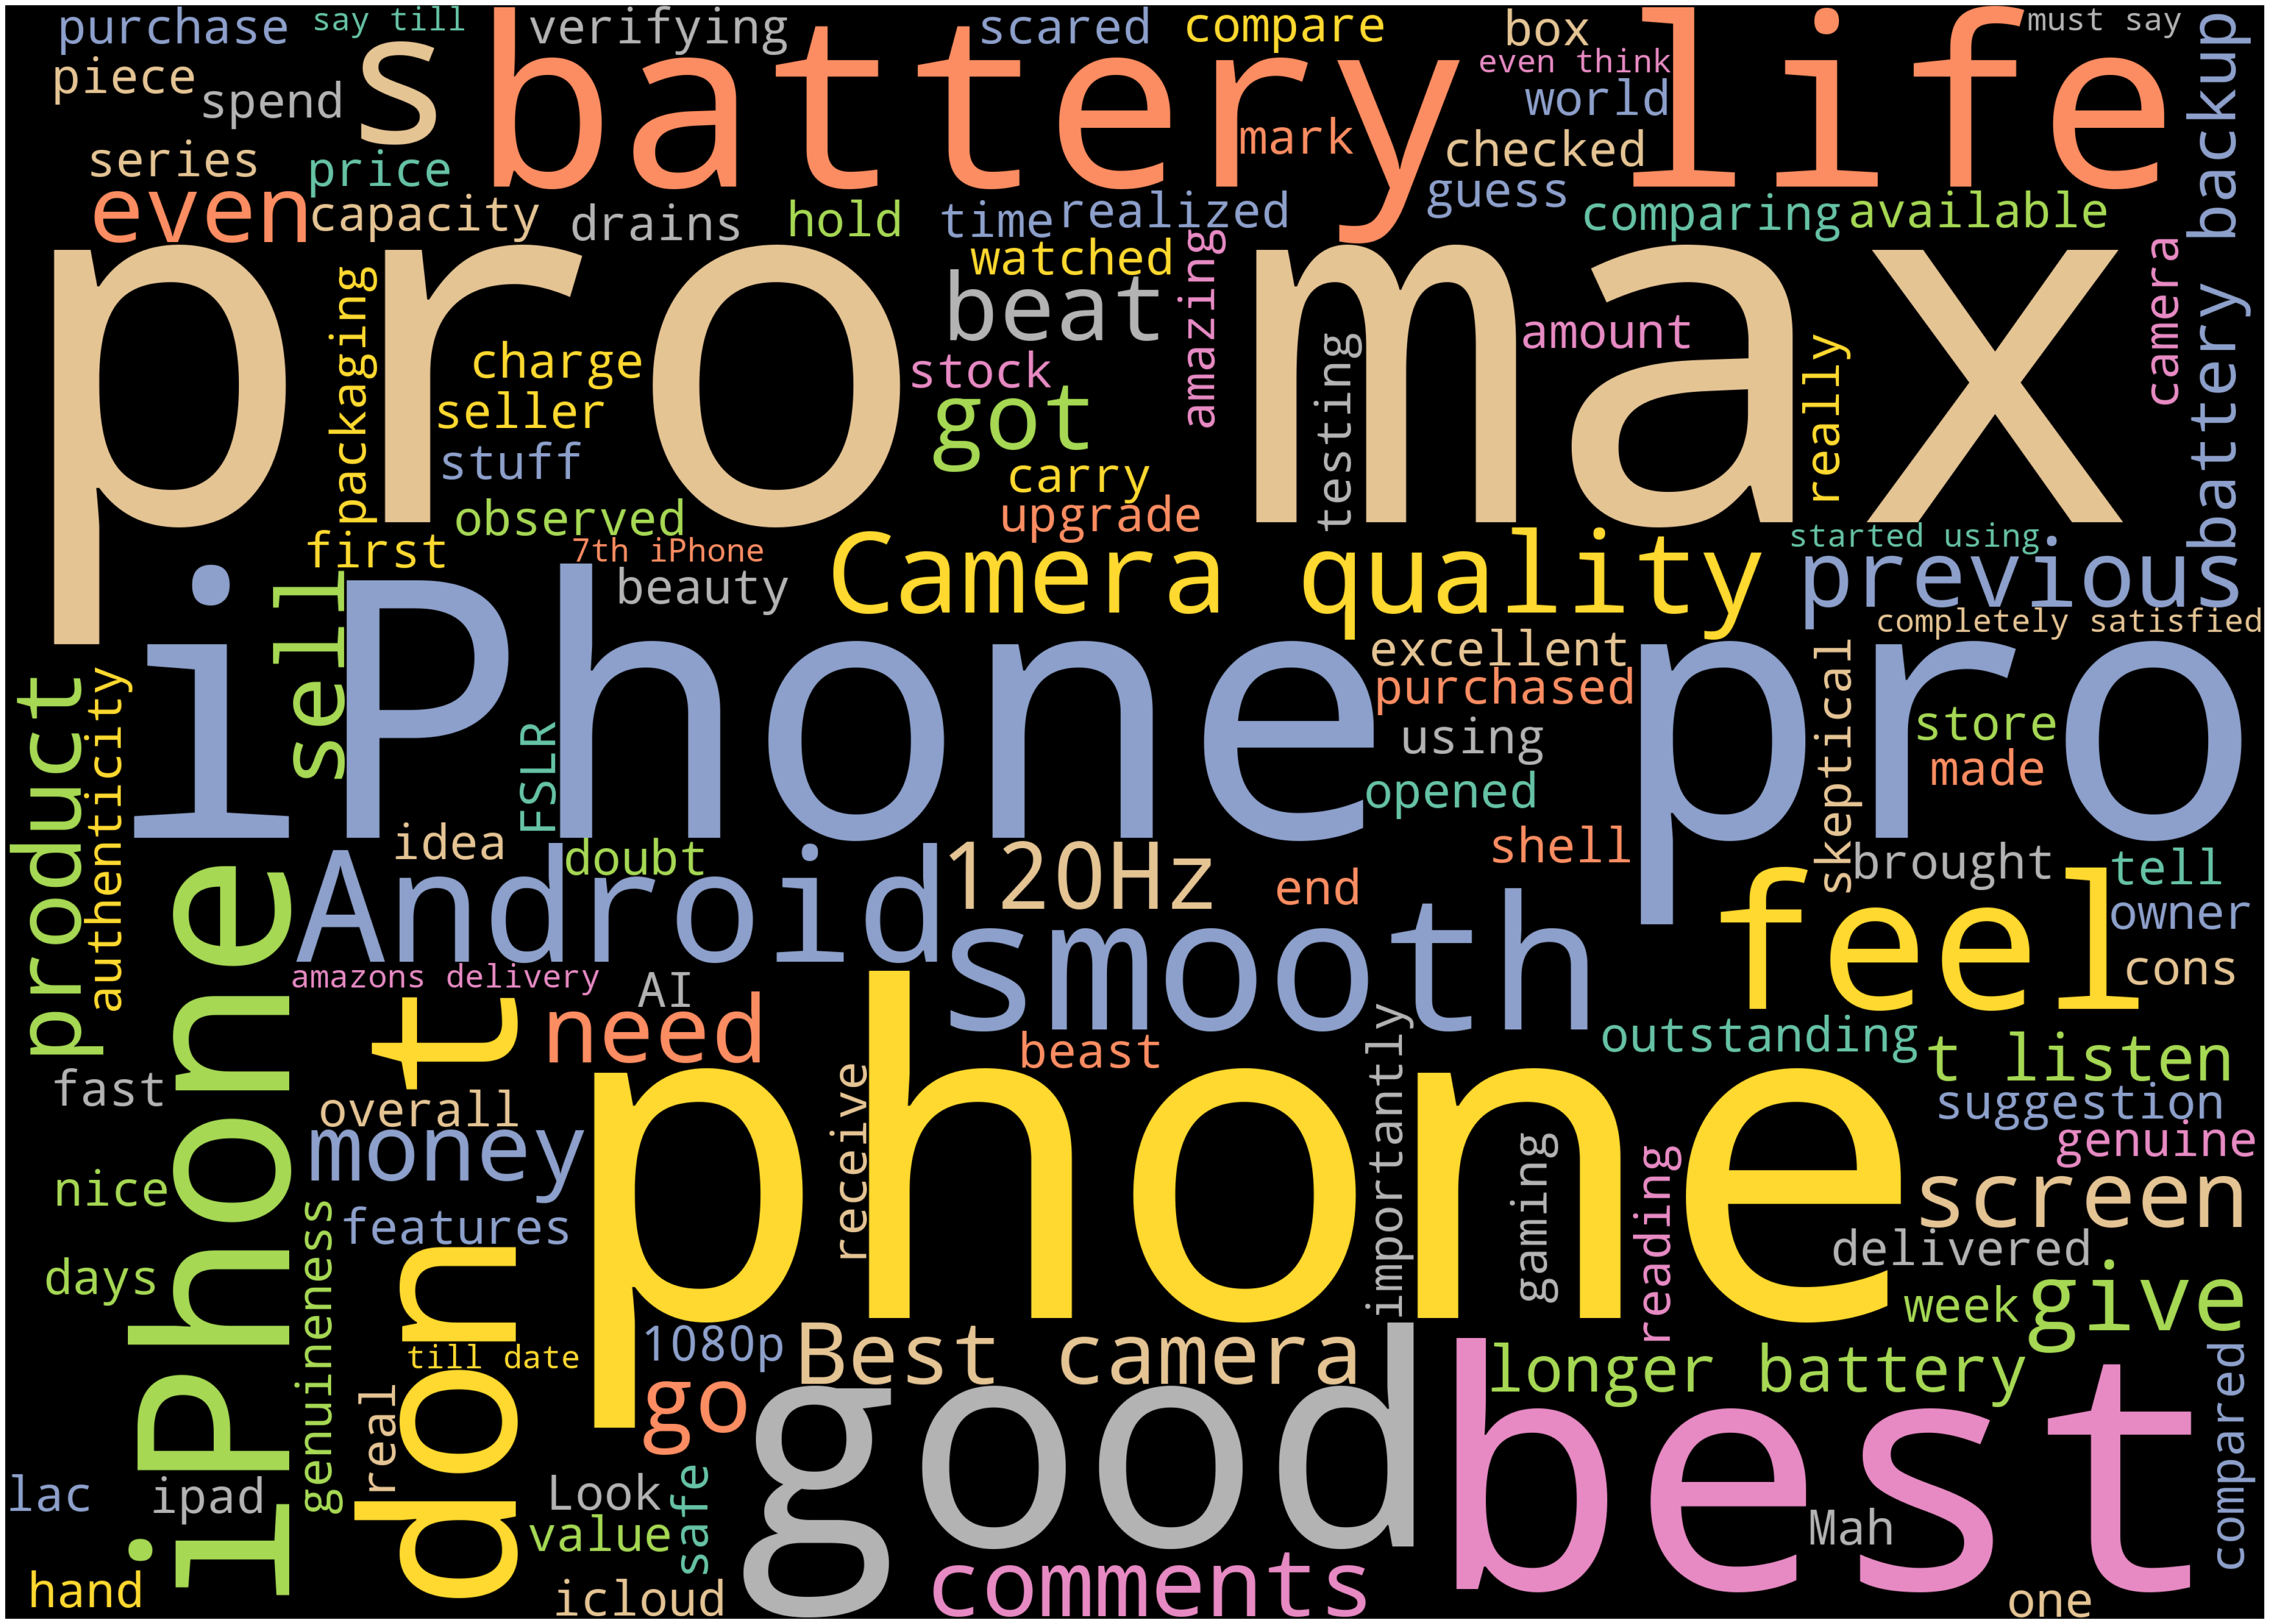

In [69]:
wordcloud = WordCloud(width = 3500,height = 2500,background_color='black',max_words=120,colormap='Set2').generate(df1)
plot_cloud(wordcloud)

In [70]:
df5=iphone13_reviews

In [71]:
df5

['\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.\n',
 '\n1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as com

### 11) Removing both leading and trailing characters along with empty strings

In [72]:
df5 = [x.strip() for x in df5] 
df5 = [x for x in df5 if x] 
df5[0:10]

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 '1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to ot

In [73]:
one1 = df5[1]
doc1 = nlp(one1)
spacy.displacy.render(doc1, style='ent', jupyter=True)

In [74]:
one1

'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.'

In [75]:
for token in doc1[:]:
    print(token, token.pos_)

I PRON
have AUX
started VERB
using VERB
iPhone PROPN
from ADP
5 NUM
series NOUN
and CCONJ
since SCONJ
then ADV
this PRON
is AUX
7th ADJ
iPhone PROPN
which PRON
I PRON
upgrade VERB
and CCONJ
I PRON
must AUX
say VERB
till SCONJ
date NOUN
this PRON
has AUX
got VERB
the DET
best ADJ
battery NOUN
I PRON
have AUX
observed VERB
in ADP
any PRON
of ADP
my PRON
previous ADJ
iPhones NOUN
. PUNCT
Camera NOUN
quality NOUN
you PRON
ca AUX
n’t PART
even ADV
think VERB
of ADP
comparing VERB
it PRON
with ADP
any DET
other ADJ
phone NOUN
in ADP
the DET
world NOUN
. PUNCT
You PRON
definitely ADV
do AUX
n’t PART
need VERB
to PART
carry VERB
a DET
FSLR NOUN
or CCONJ
a DET
video NOUN
cam NOUN
after SCONJ
you PRON
own VERB
this DET
piece NOUN
. PUNCT
You PRON
can AUX
literally ADV
make VERB
a DET
professional ADJ
movie NOUN
from ADP
its PRON
camera NOUN
. PUNCT
The DET
only ADJ
thing NOUN
is AUX
that SCONJ
you PRON
need VERB
to PART
shell VERB
out ADP
hell NOUN
lot NOUN
of ADP
money NOUN
to PART
be AUX
the D

### 12) Lets Filter Nouns and Verbs

In [76]:
nv = [token.text for token in doc1 if token.pos_ in ('NOUN', 'VERB')]
nv

['started',
 'using',
 'series',
 'upgrade',
 'say',
 'date',
 'got',
 'battery',
 'observed',
 'iPhones',
 'Camera',
 'quality',
 'think',
 'comparing',
 'phone',
 'world',
 'need',
 'carry',
 'FSLR',
 'video',
 'cam',
 'own',
 'piece',
 'make',
 'movie',
 'camera',
 'thing',
 'need',
 'shell',
 'hell',
 'lot',
 'money',
 'owner',
 'beauty',
 'end',
 '’s',
 'gives',
 'satisfaction',
 'give',
 'own',
 'suggestion',
 'go',
 'have',
 'capacity',
 'own']

In [77]:
cv = CountVectorizer()

In [78]:
x = cv.fit_transform(nv)

In [79]:
x

<45x40 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [80]:
cv.get_feature_names_out()

array(['battery', 'beauty', 'cam', 'camera', 'capacity', 'carry',
       'comparing', 'date', 'end', 'fslr', 'give', 'gives', 'go', 'got',
       'have', 'hell', 'iphones', 'lot', 'make', 'money', 'movie', 'need',
       'observed', 'own', 'owner', 'phone', 'piece', 'quality',
       'satisfaction', 'say', 'series', 'shell', 'started', 'suggestion',
       'thing', 'think', 'upgrade', 'using', 'video', 'world'],
      dtype=object)

In [81]:
df6 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
df6

,battery,beauty,cam,camera,capacity,carry,comparing,date,end,fslr,...,series,shell,started,suggestion,thing,think,upgrade,using,video,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
sum1 = x.sum(axis=0)

In [83]:
cv.vocabulary_

{'started': 32,
 'using': 37,
 'series': 30,
 'upgrade': 36,
 'say': 29,
 'date': 7,
 'got': 13,
 'battery': 0,
 'observed': 22,
 'iphones': 16,
 'camera': 3,
 'quality': 27,
 'think': 35,
 'comparing': 6,
 'phone': 25,
 'world': 39,
 'need': 21,
 'carry': 5,
 'fslr': 9,
 'video': 38,
 'cam': 2,
 'own': 23,
 'piece': 26,
 'make': 18,
 'movie': 20,
 'thing': 34,
 'shell': 31,
 'hell': 15,
 'lot': 17,
 'money': 19,
 'owner': 24,
 'beauty': 1,
 'end': 8,
 'gives': 11,
 'satisfaction': 28,
 'give': 10,
 'suggestion': 33,
 'go': 12,
 'have': 14,
 'capacity': 4}

In [84]:
df7 = pd.DataFrame({'word' : cv.get_feature_names_out(),'count' : np.array(sum1).flatten()})
df7

,word,count
0,battery,1
1,beauty,1
2,cam,1
3,camera,2
4,capacity,1
5,carry,1
6,comparing,1
7,date,1
8,end,1
9,fslr,1


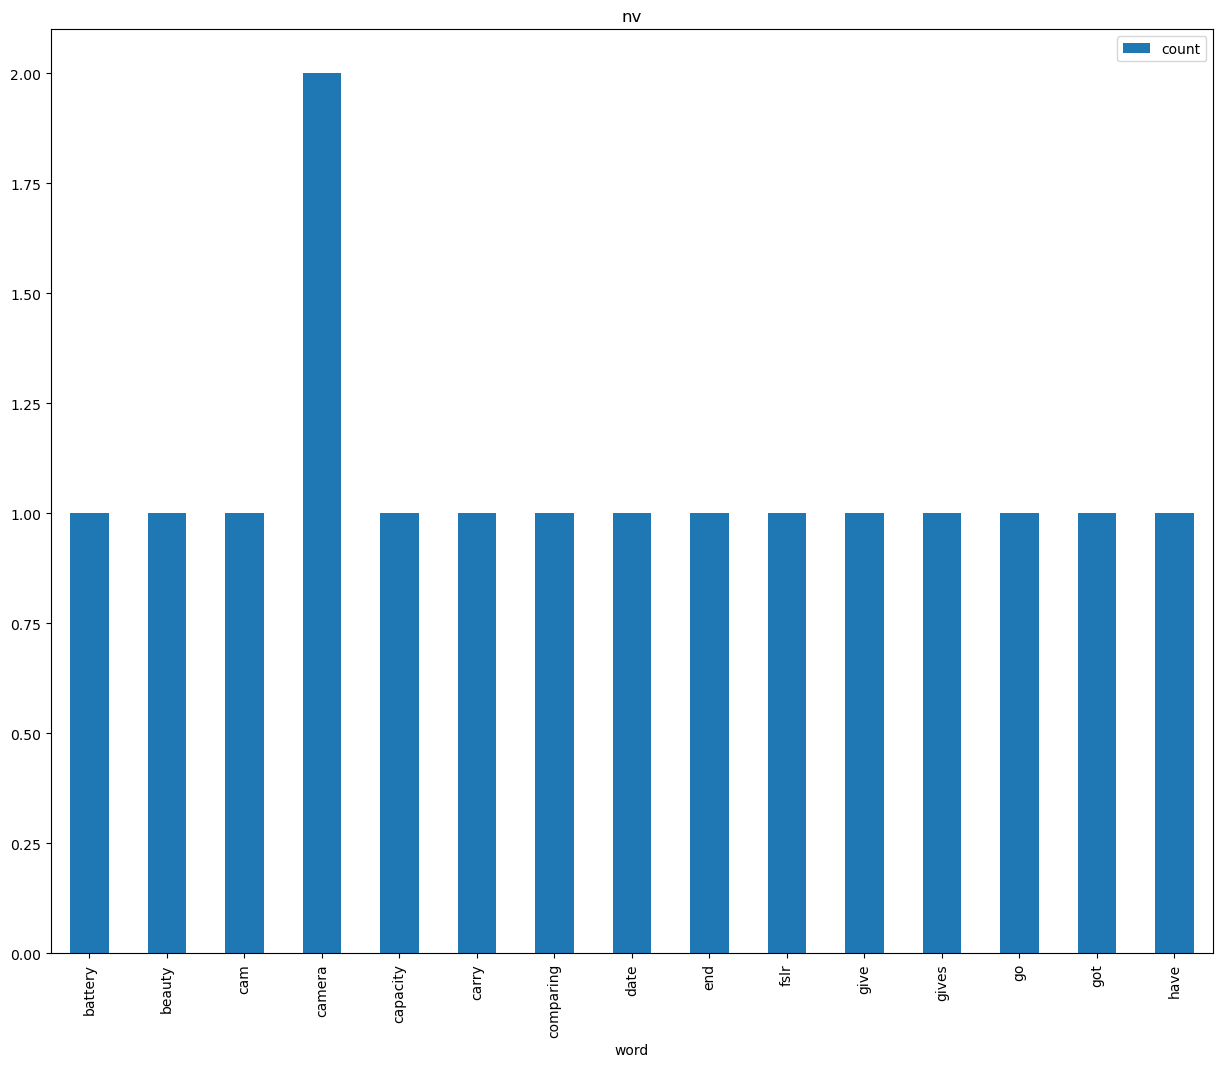

In [85]:
df7[0:15].plot.bar(x='word', figsize=(15,12), title='nv');

### 13) Lets Perform Sentiment Analysis

In [86]:
aff= pd.read_csv('afinn.csv',sep = ",",encoding = 'latin-1')
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [87]:
df

['i was completely satisfied with amazons delivery, it was safe. the phone is amazing',
 'I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 '1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to ot

In [88]:
df8 = tokenize.sent_tokenize(" ".join(df5))

In [89]:
df8

['i was completely satisfied with amazons delivery, it was safe.',
 'the phone is amazing I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones.',
 'Camera quality you can’t even think of comparing it with any other phone in the world.',
 'You definitely don’t need to carry a FSLR or a video cam after you own this piece.',
 'You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 '1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max.',
 'Camera quality is just superb, pics from 13 pro max looks more real 

In [90]:
df9= pd.DataFrame(df8, columns=['sentence'])
df9

,sentence
0,i was completely satisfied with amazons delive...
1,the phone is amazing I have started using iPho...
2,Camera quality you can’t even think of compari...
3,You definitely don’t need to carry a FSLR or a...
4,You can literally make a professional movie fr...
...,...
211,It has been 1 week and I found battery backup ...
212,No doubt about other features of the iPhone.
213,Would first like to tell that don’t listen to ...
214,Battery backup good but not good for gaming as...


In [91]:
affinity_scores = aff.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [92]:
nlp = spacy.load('en_core_web_sm')

In [93]:
sentiment_lexicon = affinity_scores

In [94]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) 
    return sent_score

#### Lets test it

In [95]:
calculate_sentiment(text = 'bad')

-3

In [96]:
calculate_sentiment(text = 'wonderful')

4

In [97]:
calculate_sentiment(text = 'good')

3

In [98]:
df9['sentiment_value'] = df9['sentence'].apply(calculate_sentiment)

In [99]:
df9

,sentence,sentiment_value
0,i was completely satisfied with amazons delive...,3
1,the phone is amazing I have started using iPho...,7
2,Camera quality you can’t even think of compari...,0
3,You definitely don’t need to carry a FSLR or a...,0
4,You can literally make a professional movie fr...,-1
...,...,...
211,It has been 1 week and I found battery backup ...,3
212,No doubt about other features of the iPhone.,-2
213,Would first like to tell that don’t listen to ...,5
214,Battery backup good but not good for gaming as...,8


In [100]:
df9['no_of_words'] = df9['sentence'].str.split().apply(len)

In [101]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,3,10
1,the phone is amazing I have started using iPho...,7,43
2,Camera quality you can’t even think of compari...,0,16
3,You definitely don’t need to carry a FSLR or a...,0,17
4,You can literally make a professional movie fr...,-1,63
...,...,...,...
211,It has been 1 week and I found battery backup ...,3,13
212,No doubt about other features of the iPhone.,-2,8
213,Would first like to tell that don’t listen to ...,5,65
214,Battery backup good but not good for gaming as...,8,62


In [102]:
df9.sort_values(by='sentiment_value')

,sentence,sentiment_value,no_of_words
197,"With no charger!2) Software wise, the notifica...",-4,10
68,"With no charger!2) Software wise, the notifica...",-4,10
111,"With no charger!2) Software wise, the notifica...",-4,10
25,"With no charger!2) Software wise, the notifica...",-4,10
154,"With no charger!2) Software wise, the notifica...",-4,10
...,...,...,...
214,Battery backup good but not good for gaming as...,8,62
128,Battery backup good but not good for gaming as...,8,62
42,Battery backup good but not good for gaming as...,8,62
171,Battery backup good but not good for gaming as...,8,62


### 14) Lets look at the sentiment score

In [103]:
df9[df9['sentiment_value']<=0].head()

,sentence,sentiment_value,no_of_words
2,Camera quality you can’t even think of compari...,0,16
3,You definitely don’t need to carry a FSLR or a...,0,17
4,You can literally make a professional movie fr...,-1,63
8,Very smooth and fast performance.,0,5
9,Just go for it.,0,4


In [104]:
df9[df9['sentiment_value']<=0].head()['sentence'].tolist()

['Camera quality you can’t even think of comparing it with any other phone in the world.',
 'You definitely don’t need to carry a FSLR or a video cam after you own this piece.',
 'You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.',
 'Very smooth and fast performance.',
 'Just go for it.']

In [105]:
import seaborn as sns

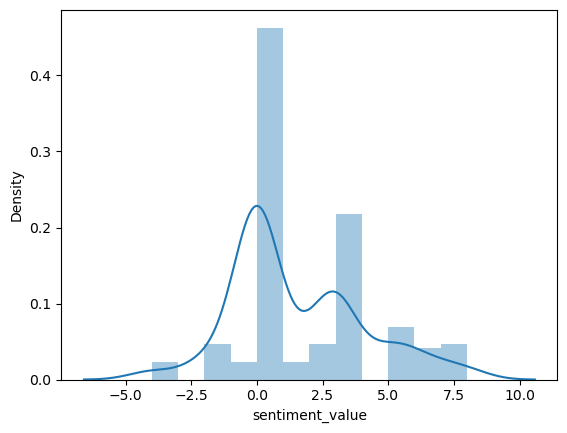

In [106]:
sns.distplot(df9['sentiment_value']);

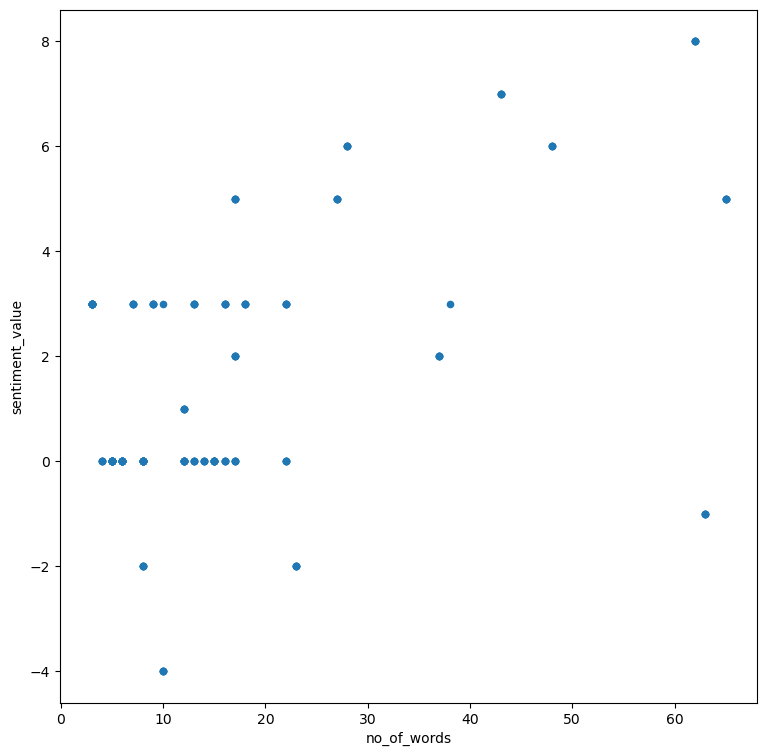

In [107]:
df9.plot.scatter(x='no_of_words',y='sentiment_value',figsize=(9,9));

In [108]:
pw=pd.read_csv('positive-words.txt',on_bad_lines='skip')
pw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [109]:
pw=pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [110]:
nw=pd.read_csv('negative-words.txt',encoding='latin-1',on_bad_lines='skip')
nw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [111]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [112]:
affinity_scores1 = pw.set_index('Words')['Score'].to_dict()
affinity_scores2 = nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [113]:
sentiment_lexicon = affinity_scores

In [114]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [115]:
df9['sentiment_value'] = df9['sentence'].apply(calculate_sentiment)

In [116]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,2,10
1,the phone is amazing I have started using iPho...,2,43
2,Camera quality you can’t even think of compari...,0,16
3,You definitely don’t need to carry a FSLR or a...,0,17
4,You can literally make a professional movie fr...,1,63
...,...,...,...
211,It has been 1 week and I found battery backup ...,1,13
212,No doubt about other features of the iPhone.,-1,8
213,Would first like to tell that don’t listen to ...,3,65
214,Battery backup good but not good for gaming as...,3,62


In [117]:
df9['no_of_words'] = df9['sentence'].str.split().apply(len)

In [118]:
df9

,sentence,sentiment_value,no_of_words
0,i was completely satisfied with amazons delive...,2,10
1,the phone is amazing I have started using iPho...,2,43
2,Camera quality you can’t even think of compari...,0,16
3,You definitely don’t need to carry a FSLR or a...,0,17
4,You can literally make a professional movie fr...,1,63
...,...,...,...
211,It has been 1 week and I found battery backup ...,1,13
212,No doubt about other features of the iPhone.,-1,8
213,Would first like to tell that don’t listen to ...,3,65
214,Battery backup good but not good for gaming as...,3,62


In [119]:
df9.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,no_of_words
113,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
126,No doubt about other features of the iPhone.,-1,8
35,I first purchased iPhone 14 pro then I realize...,-1,22
27,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
83,No doubt about other features of the iPhone.,-1,8


In [120]:
df9['sentiment_value'].describe()

count    216.000000
mean       0.833333
std        1.196895
min       -1.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: sentiment_value, dtype: float64

In [121]:
df9[df9['sentiment_value']<0].head()

,sentence,sentiment_value,no_of_words
27,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
35,I first purchased iPhone 14 pro then I realize...,-1,22
40,No doubt about other features of the iPhone.,-1,8
70,"Also, it’s really tricky to transfer Whatsapp ...",-1,13
78,I first purchased iPhone 14 pro then I realize...,-1,22


In [122]:
df9[df9['sentiment_value']<=-1].head(10)['sentence']

27     Also, it’s really tricky to transfer Whatsapp ...
35     I first purchased iPhone 14 pro then I realize...
40          No doubt about other features of the iPhone.
70     Also, it’s really tricky to transfer Whatsapp ...
78     I first purchased iPhone 14 pro then I realize...
83          No doubt about other features of the iPhone.
113    Also, it’s really tricky to transfer Whatsapp ...
121    I first purchased iPhone 14 pro then I realize...
126         No doubt about other features of the iPhone.
156    Also, it’s really tricky to transfer Whatsapp ...
Name: sentence, dtype: object

In [123]:
df9['index'] = range(0, len(df9))

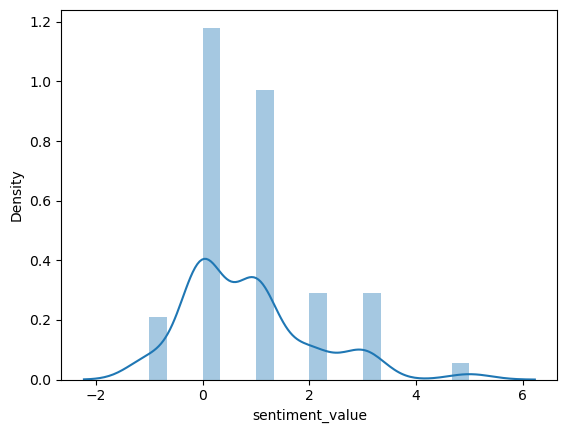

In [124]:
sns.distplot(df9['sentiment_value']);

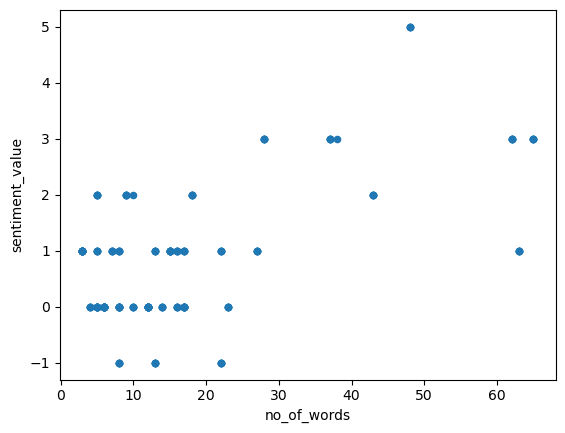

In [125]:
df9.plot.scatter(x='no_of_words',y='sentiment_value');

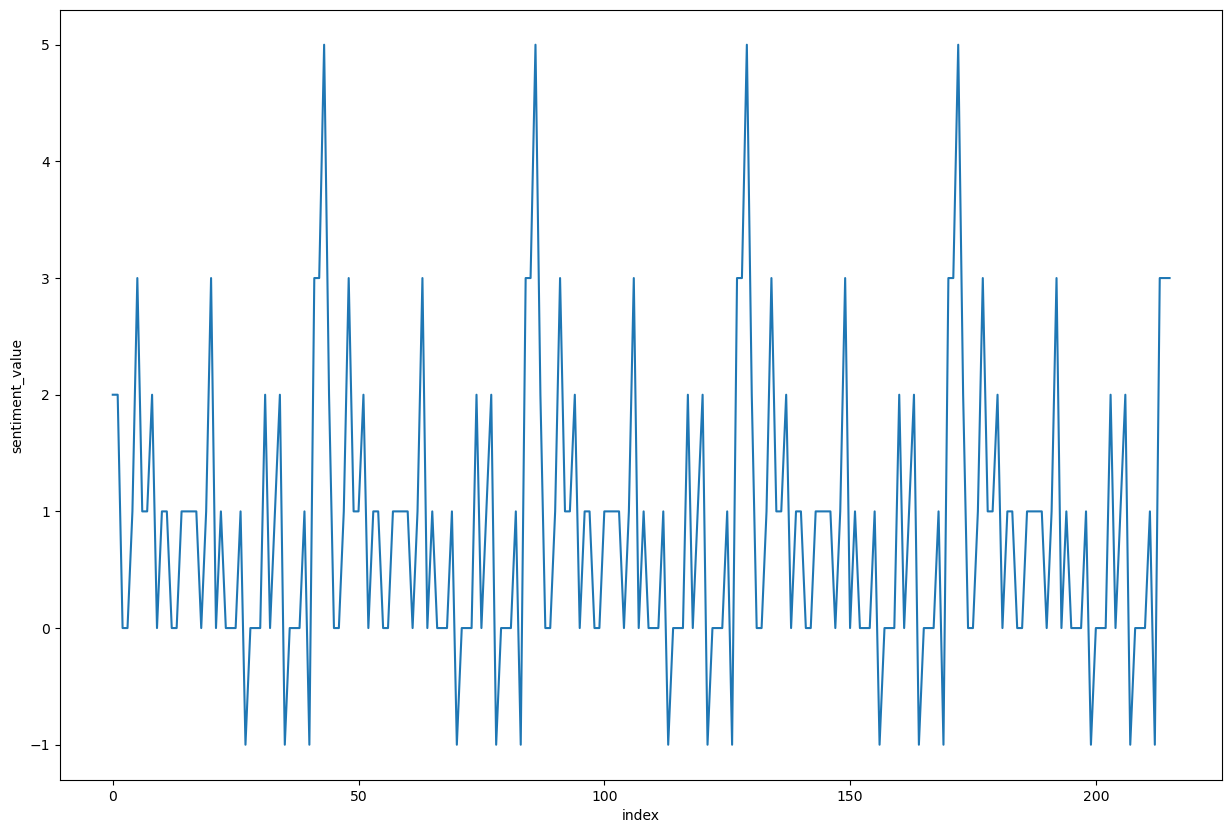

In [126]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df9);